Based on your project's objectives and guidelines, here’s a comprehensive plan addressing your question about deep learning and classical ML for predicting job satisfaction:

1. **Baseline Classical ML Model**: Start by implementing a baseline classical machine learning model. This will help establish a foundational performance level, making it easier to assess the improvements (if any) achieved by the deep learning approach. Techniques such as Random Forests, SVMs, or Gradient Boosting can serve as effective baselines.

2. **Multi-Label and Multi-Category Columns**: With your dataset containing multi-label columns, you’ll need specific preprocessing:
   - **Label Encoding**: Consider label encoding for each multi-category variable. Using embeddings in the deep learning model could also be beneficial for high-cardinality categorical features.
   - **One-Hot Encoding**: This works well for classical ML models but can inflate feature space if there are many categories.
   - **Embedding Layers in Deep Learning**: For deep learning models, embedding layers are recommended for multi-category features, especially when categories have relationships or orders.

3. **Deep Learning Model**: Given your project’s scope, building a deep learning model can be advantageous:
   - **Architecture**: Use a feedforward neural network initially, with embedding layers for multi-category columns. Test deeper architectures or even explore Transformer models if you have sufficient computational resources.
   - **Multi-Label Support**: Deep learning can handle multi-label outputs effectively, especially with architectures designed for such purposes.
   - **TF-IDF Features**: If text-based features are included, you can incorporate TF-IDF or even pre-trained embeddings.

4. **Evaluation and Comparison**: Use consistent metrics and protocols for both models. Since the project requires a concise presentation, focus on:
   - **Comparison with Evaluation Protocol**: Metrics such as accuracy, F1-score, or AUC-ROC will give insights into model performance.
   - **Interpretation**: Showcase how each model interprets and weighs the features affecting job satisfaction. SHAP or LIME can help interpret deep learning models.

5. **Presentation and Submission**: Your presentation should emphasize the steps, challenges (especially with multi-label encoding), and the performance comparison between classical and deep learning models. Include insights about whether the additional complexity of deep learning yielded significantly better results.

Let’s start a structured approach to set up your project, covering essential steps from data exploration and preprocessing to model implementation and evaluation. Here’s how we can proceed:

### Step 1: Data Exploration and Cleaning
   - **Load and Inspect the Data**: Begin by examining the structure, checking data types, and getting an initial summary (e.g., `info()`, `describe()` in Python).
   - **Check for Missing Values**: Identify any columns with missing values and decide how to handle them. Since you’re avoiding imputation for `JobSat`, removing NaNs for this column is preferable, but for other columns, consider imputation based on relevance (e.g., mean, median for numerical, mode for categorical).
   - **Identify Outliers**: Use visualization (e.g., box plots) or statistical methods (like IQR) to identify potential outliers, particularly in numerical features that may skew results.
   - **Basic Data Cleaning**: Clean up any erroneous or inconsistent entries (like unexpected strings or symbols in numerical columns). Ensure consistent formatting across columns.

### Step 2: Data Preprocessing
   - **Data Leakage Prevention**: Carefully separate training and test data to avoid any data leakage, particularly if using temporal data. Refrain from any transformation (e.g., scaling, encoding) that might introduce target information into feature space before splitting.
   - **Feature Scaling**: Scale numerical features using StandardScaler or MinMaxScaler to improve deep learning model convergence. Scaling should be applied after splitting data to prevent data leakage.
   - **Encoding Categorical and Multi-Label Features**:
      - **One-Hot Encoding**: For categorical features in classical ML models, use one-hot encoding.
      - **Label Encoding / Embedding Layers**: For multi-label features, use embedding layers in deep learning models or label encoding for simpler ML methods.
   - **TF-IDF for Text Features**: Convert any text-based features using TF-IDF and combine them with the original dataset if they add predictive value.

### Step 3: Feature Engineering
   - **Correlation Analysis**: Perform correlation analysis with `JobSat` to assess which features have the most influence. Feature importance from classical models can guide feature selection.
   - **Interaction Terms**: Create interaction terms between key features if you hypothesize they may impact job satisfaction (e.g., combining technology preferences and work satisfaction).

### Step 4: Baseline Classical ML Models
   - **Model Selection**: Start with simple classical models like Random Forests or Gradient Boosting as baselines.
   - **Hyperparameter Tuning**: Use simple random search over a range of hyperparameters. This step can be repeated for the deep learning models to assess improvement.
   - **Cross-Validation**: Perform cross-validation on the training set to check for consistency and validate the model’s generalizability.

### Step 5: Deep Learning Model Development
   - **Model Architecture**:
      - **Feedforward Network**: Design a basic feedforward neural network as a starting point. Experiment with additional layers and neurons based on results.
      - **Embedding Layers**: Implement embedding layers for multi-label or high-cardinality categorical features to capture relational patterns.
   - **Regularization**: To prevent overfitting, use dropout layers, batch normalization, or L2 regularization as needed.
   - **Loss Function and Evaluation Metrics**: Choose a suitable loss function (like binary cross-entropy for multi-label classification) and metrics (e.g., accuracy, F1-score, AUC) to evaluate your model.
   - **Optimization**: Use an optimizer like Adam and experiment with learning rate schedules to improve convergence.

### Step 6: Evaluation and Comparison
   - **Test Set Evaluation**: Evaluate both classical ML and deep learning models on the test set. Track metrics like accuracy, precision, recall, and F1-score to compare performance.
   - **Interpret Results**: Use model explainability tools like SHAP for feature importance, especially for deep learning models, to help understand the factors impacting job satisfaction.

### Step 7: Presentation Preparation
   - Summarize the problem, objectives, preprocessing steps, model approaches, and results.
   - Highlight the comparison between the baseline classical ML and deep learning models, emphasizing performance differences.
   - Present interpretability insights and discuss limitations or future improvements.


In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# np.random.seed(42)



In [17]:
import pandas as pd

# Load the dataset
data_path = 'survey_results_public.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info to understand the structure and data types
data_head = data.head()
data_info = data.info()

# Standardize column names by removing spaces and special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Display the updated column names for verification
updated_columns = data.columns.tolist()
data_head, updated_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


(   ResponseId                      MainBranch                 Age  \
 0           1  I am a developer by profession  Under 18 years old   
 1           2  I am a developer by profession     35-44 years old   
 2           3  I am a developer by profession     45-54 years old   
 3           4           I am learning to code     18-24 years old   
 4           5  I am a developer by profession     18-24 years old   
 
             Employment RemoteWork   Check  \
 0  Employed, full-time     Remote  Apples   
 1  Employed, full-time     Remote  Apples   
 2  Employed, full-time     Remote  Apples   
 3   Student, full-time        NaN  Apples   
 4   Student, full-time        NaN  Apples   
 
                                     CodingActivities  \
 0                                              Hobby   
 1  Hobby;Contribute to open-source projects;Other...   
 2  Hobby;Contribute to open-source projects;Other...   
 3                                                NaN   
 4             

In [18]:
# Function to detect multilabel columns
def find_multilabel_columns(df):
    multilabel_columns = []
    for column in df.columns:
        # Check if any cell in the column has multiple labels (separated by commas, for example)
        if df[column].apply(lambda x: isinstance(x, str) and ',' in x).any():
            multilabel_columns.append(column)
    return multilabel_columns

# Get list of multilabel columns
multilabel_columns = find_multilabel_columns(data)
print("Multilabel columns:", multilabel_columns)

Multilabel columns: ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'DevType', 'OrgSize', 'Country', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'SOComm', 'AISelect', 'AIComplex', 'AIChallenges', 'ProfessionalQuestion', 'Industry']


In [19]:
# Check for missing values across all columns
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values and their counts
missing_columns


AINextMuch_less_integrated    64289
AINextLess_integrated         63082
AINextNo_change               52939
AINextMuch_more_integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define target column (assuming JobSat is the target based on project description)
target_column = 'JobSat'
# Remove rows where the target column 'JobSat' is NaN to prevent issues with stratification
data = data.dropna(subset=[target_column])

# Re-run the train-test split after handling NaN values in the target column
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# Separate features and target columns again for imputation
train_features = train_data.drop(columns=[target_column])
train_target = train_data[target_column]
test_features = test_data.drop(columns=[target_column])
test_target = test_data[target_column]

# Reapply imputation for missing values based on training data
for col in train_features.columns:
    if train_features[col].dtype == 'object':
        mode_value = train_features[col].mode()[0]
        train_features[col] = train_features[col].fillna(mode_value)
        test_features[col] = test_features[col].fillna(mode_value)
    else:
        median_value = train_features[col].median()
        train_features[col] = train_features[col].fillna(median_value)
        test_features[col] = test_features[col].fillna(median_value)

# Recombine features with target for both train and test sets
train_data = pd.concat([train_features, train_target], axis=1)
test_data = pd.concat([test_features, test_target], axis=1)

# Confirm no missing values remain in the modified dataset
train_missing_values = train_data.isnull().sum().sum()
test_missing_values = test_data.isnull().sum().sum()

train_missing_values, test_missing_values


(0, 0)

In [21]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,...,80.0,50.0,20.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66000.0,5.0
40638,40639,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,...,9.0,9.0,9.0,9.0,9.0,9.0,Appropriate in length,Easy,66000.0,7.0
39715,39716,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,...,40.0,50.0,10.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,110000.0,7.0
39649,39650,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,73312.0,9.0
44832,44833,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,20.0,20.0,0.0,0.0,Appropriate in length,Easy,66000.0,8.0


In [22]:
train_data.shape

(23300, 114)

In [23]:
# train_data.head()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns for outlier detection
numerical_columns = train_features.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display per row
columns_per_row = 3
# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.boxplot(x=train_features[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

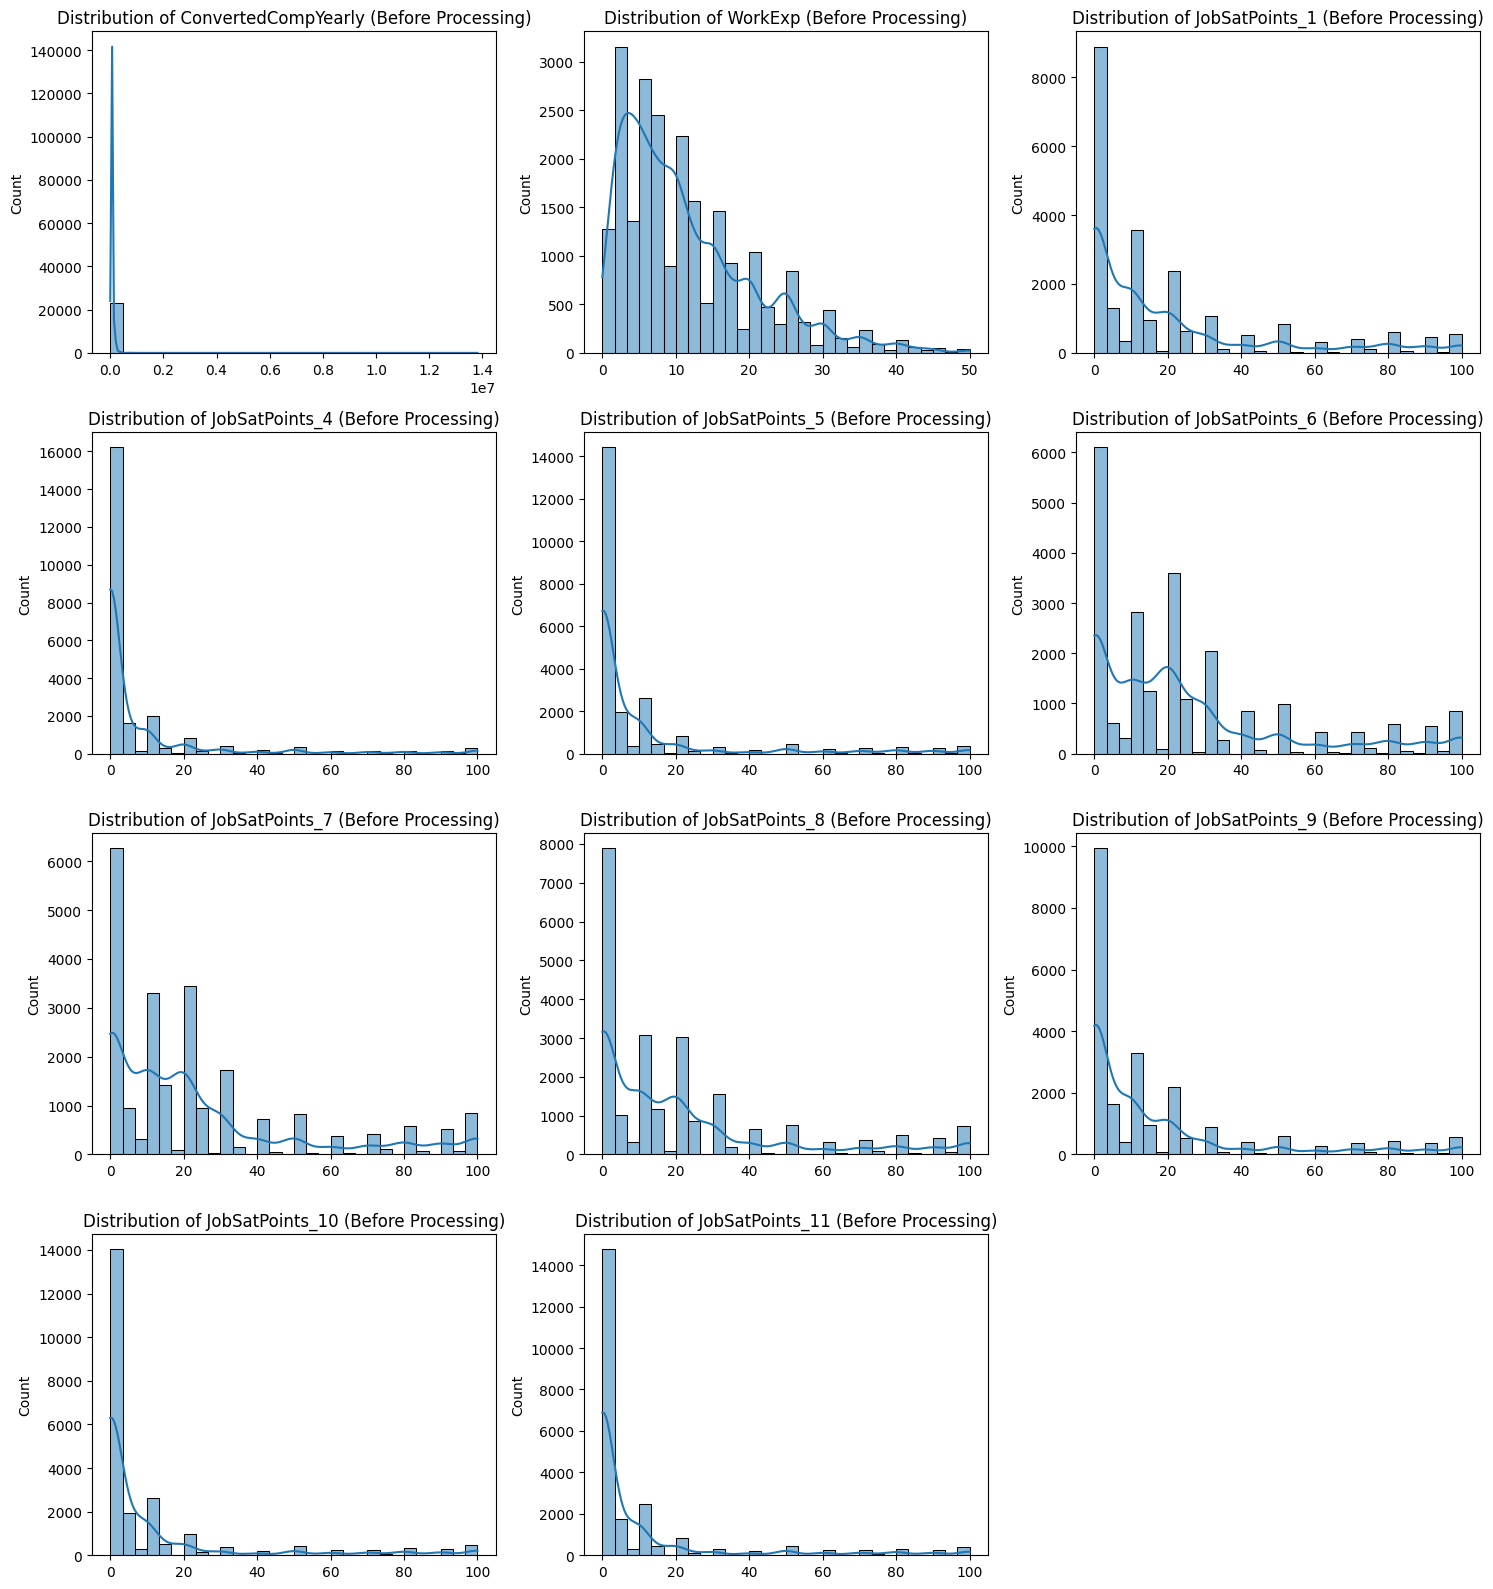

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define columns with potential outliers
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]

# Visualize the distributions of the features before any transformations or outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Before Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


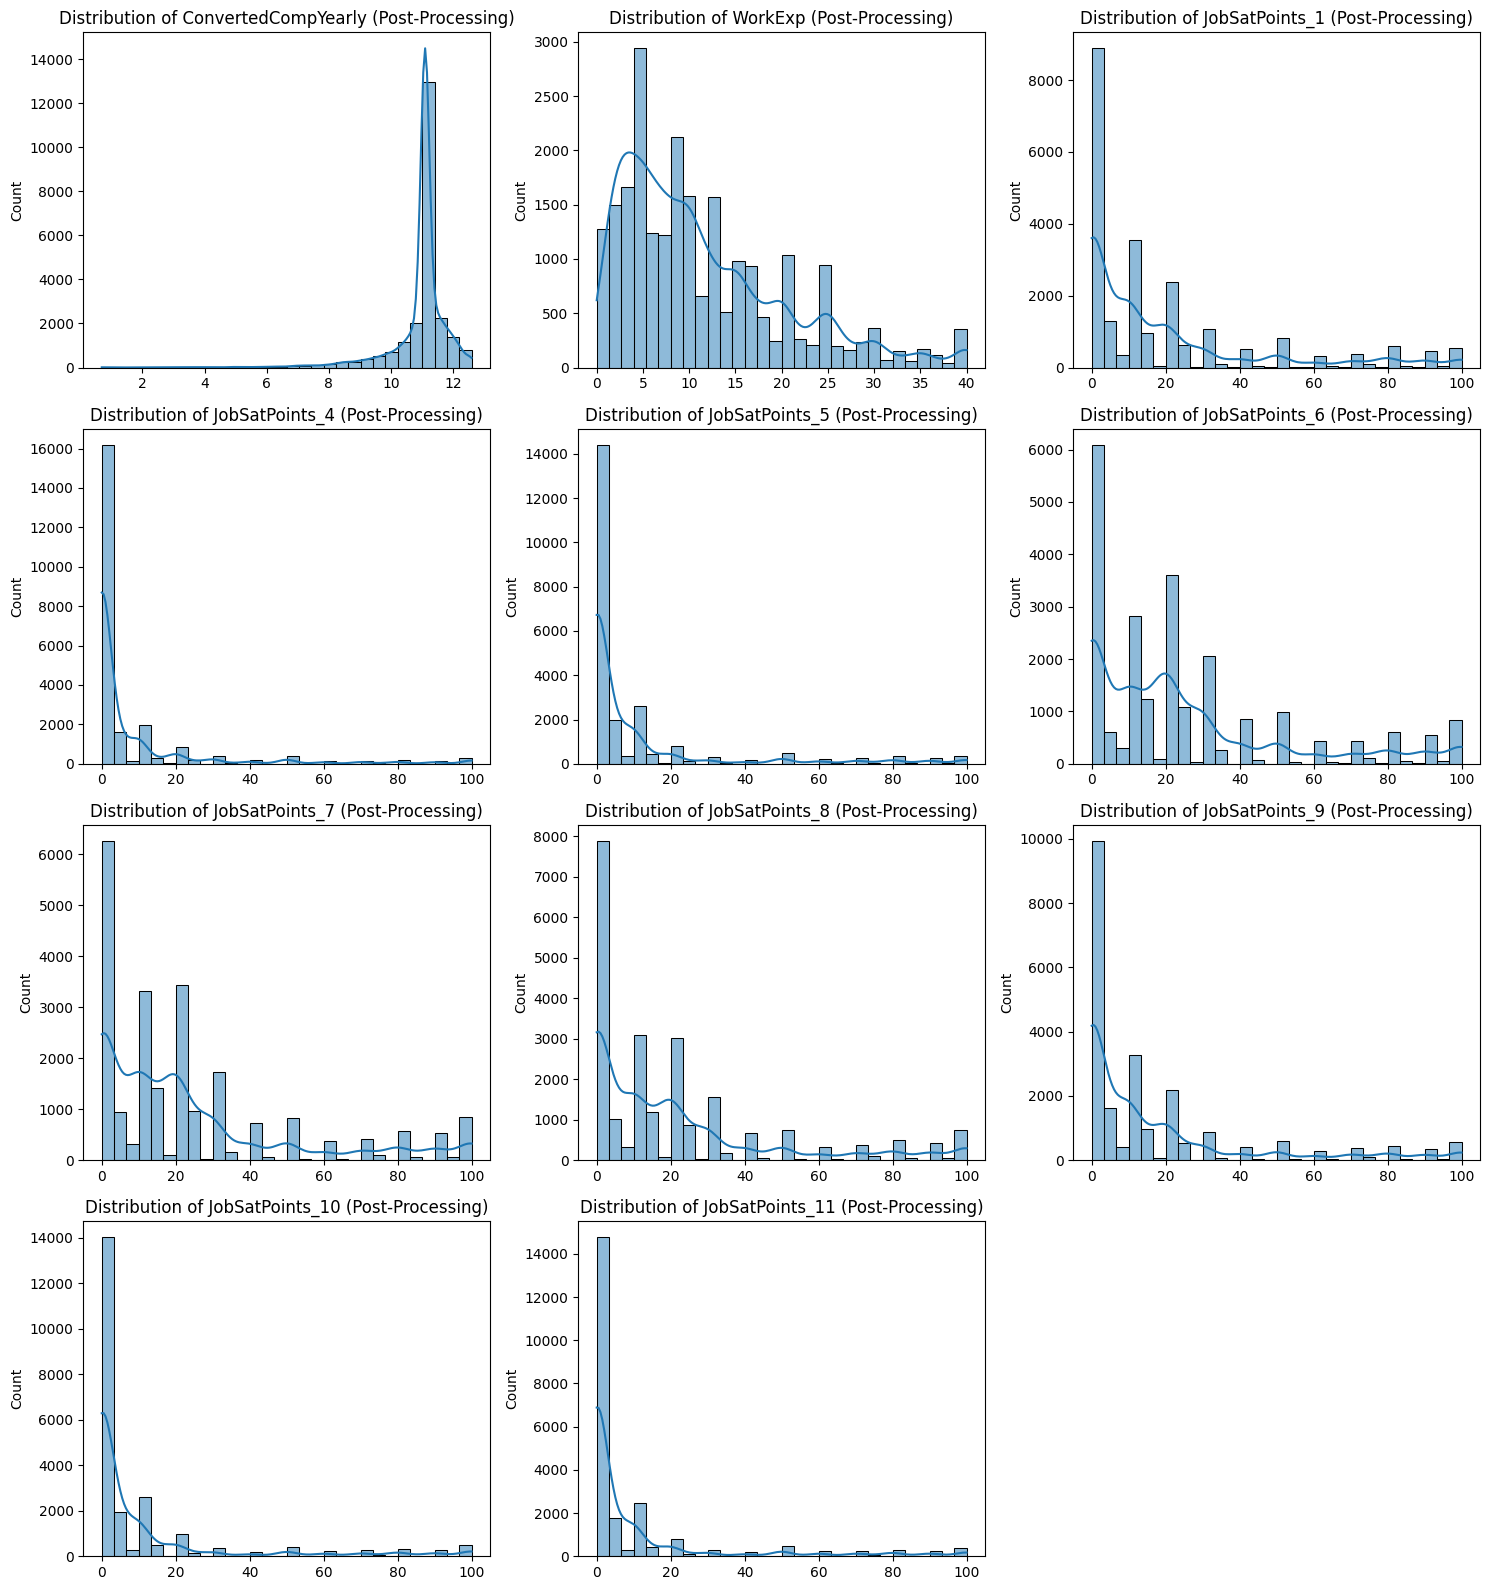

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Handle NaN values first (if any) in the relevant columns before transformation
train_features['ConvertedCompYearly'] = train_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN
test_features['ConvertedCompYearly'] = test_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN

# Check for negative values in 'ConvertedCompYearly' before applying log transformation
if (train_features['ConvertedCompYearly'] < 0).any() or (test_features['ConvertedCompYearly'] < 0).any():
    raise ValueError("Negative values found in 'ConvertedCompYearly', which cannot be log-transformed directly.")

# Apply log transformation to 'ConvertedCompYearly' to reduce skewness
train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# Define columns with potential outliers and set the 99th percentile cap using training data
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]
cap_values = {col: train_features[col].quantile(0.99) for col in outlier_columns}

# Apply the cap values to both training and test sets for consistency
for col in outlier_columns:
    cap_value = cap_values[col]
    train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
    test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# Visualize the adjusted distributions to confirm outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Post-Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


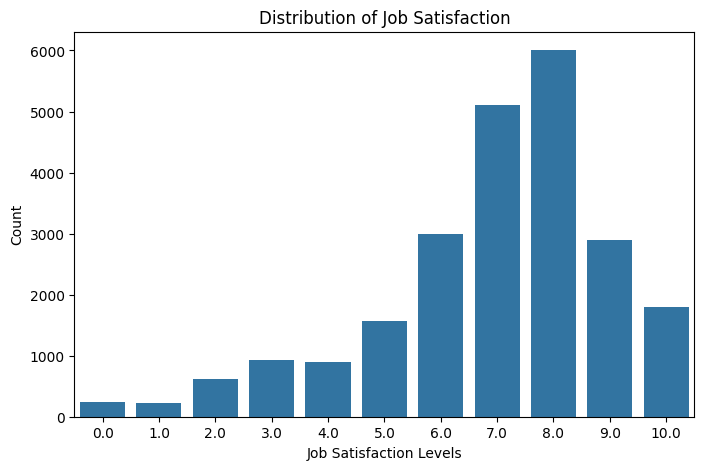

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable `JobSat` to understand class balance
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['JobSat'])
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Count")
plt.show()


In [ ]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,...,80.0,50.0,20.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66000.0,5.0
40638,40639,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,...,9.0,9.0,9.0,9.0,9.0,9.0,Appropriate in length,Easy,66000.0,7.0
39715,39716,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,...,40.0,50.0,10.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,110000.0,7.0
39649,39650,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,73312.0,9.0
44832,44833,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,20.0,20.0,0.0,0.0,Appropriate in length,Easy,66000.0,8.0


In [ ]:
# Check for missing values across all columns in the training and test datasets after processing
missing_values_train = train_features.isnull().sum()
missing_values_test = test_features.isnull().sum()

# Display columns with missing values in the training and test datasets
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_test = missing_values_test[missing_values_test > 0]

missing_values_train, missing_values_test


(Series([], dtype: int64), Series([], dtype: int64))

In [ ]:
import pandas as pd

# Assuming train_data and test_data are already defined as per the user's code

# Combine train and test data into a single DataFrame with an indicator for train/test split
train_data['Dataset'] = 'train'
test_data['Dataset'] = 'test'

# Concatenate both dataframes
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save to a single CSV file
combined_data.to_csv("combined_train_test.csv", index=False)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns from both train and test sets
columns_to_drop = ['ResponseId', 'CompTotal']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Identify numerical columns for normalization, excluding the target column
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.drop('JobSat')

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify normalization results by checking the first few rows of the transformed data
print(train_data[numerical_columns].head())
print(test_data[numerical_columns].head())


        WorkExp  JobSatPoints_1  JobSatPoints_4  JobSatPoints_5  \
16835 -0.162030        2.363619        3.346667       -0.463324   
40638 -0.708524       -0.337094       -0.088671       -0.098033   
39715  0.165867       -0.722910       -0.410734       -0.463324   
39649 -0.162030       -0.722910       -0.410734       -0.463324   
44832 -0.380628       -0.337094        0.662809       -0.463324   

       JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  \
16835        2.042237        0.991104       -0.021210       -0.657132   
40638       -0.578696       -0.527402       -0.441800       -0.296077   
39715        0.565655        0.991104       -0.403565       -0.657132   
39649        0.934800       -0.860732        1.125852       -0.657132   
44832       -0.357209       -0.305181       -0.021210        0.145213   

       JobSatPoints_10  JobSatPoints_11  ConvertedCompYearly  
16835        -0.480858        -0.459510            -0.081190  
40638        -0.087861        -0

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
import keras
print("Keras version:", keras.__version__)


Keras version: 3.6.0


In [ ]:
train_data.JobSat

16835    5.0
40638    7.0
39715    7.0
39649    9.0
44832    8.0
        ... 
44573    8.0
13426    8.0
28068    8.0
18492    7.0
23875    2.0
Name: JobSat, Length: 23300, dtype: float64

In [ ]:
print("Available columns in train_data:", train_data.columns.tolist())


Available columns in train_data: ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWork

In [ ]:
train_data.shape

(23300, 113)

In [ ]:
train_data.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)

In [ ]:
train_data.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Dataset
16835,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,...,0.991104,-0.021210,-0.657132,-0.480858,-0.459510,Appropriate in length,Neither easy nor difficult,-0.081190,5.0,train
40638,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,-0.527402,-0.441800,-0.296077,-0.087861,-0.047057,Appropriate in length,Easy,-0.081190,7.0,train
39715,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,API document(s) and/or SDK document(s);User gu...,...,0.991104,-0.403565,-0.657132,-0.480858,-0.459510,Appropriate in length,Neither easy nor difficult,0.234404,7.0,train
39649,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,-0.860732,1.125852,-0.657132,-0.480858,-0.459510,Appropriate in length,Easy,-0.028744,9.0,train
44832,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,-0.305181,-0.021210,0.145213,-0.480858,-0.459510,Appropriate in length,Easy,-0.081190,8.0,train


In [ ]:
# List of categorical columns in the train_data
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Initialize lists to store multilabel and non-multilabel categorical columns
multilabel_columns = []
non_multilabel_columns = []

# Iterate over the categorical columns to check for semicolons
for col in categorical_columns:
    # Check if any value in the column contains a semicolon
    if train_data[col].str.contains(';').any():
        multilabel_columns.append(col)  # Add to multilabel columns
    else:
        non_multilabel_columns.append(col)  # Add to non-multilabel columns

# Print the results
print("Multilabel Columns:", multilabel_columns)
print("Non-multilabel Columns:", non_multilabel_columns)


Multilabel Columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'BuyNewTool', 'TechEndorse', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWork

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    return train_data, test_data, le


# Apply encoding on non-multilabel columns (for Label Encoding)
for col in non_multilabel_columns:
    train_data, test_data, le = encode_column(train_data, test_data, col)

# You can add code here to process multilabel columns using Embedding layers (as per your previous approach).

# Check that encoding was applied correctly
print(train_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [ ]:
# Assuming 'JobSat' is the target variable
y_train = train_data['JobSat']  
y_test = test_data['JobSat']

# Define X_train and X_test by including both multilabel and non-multilabel columns
X_train_multilabel = [train_data[col] for col in multilabel_columns if col in train_data.columns]
X_train_non_multilabel = [train_data[col] for col in non_multilabel_columns if col in train_data.columns]

# Convert X_train to a DataFrame
X_train = pd.concat(X_train_multilabel + X_train_non_multilabel, axis=1)

X_test_multilabel = [test_data[col] for col in multilabel_columns if col in test_data.columns]
X_test_non_multilabel = [test_data[col] for col in non_multilabel_columns if col in test_data.columns]

# Convert X_test to a DataFrame
X_test = pd.concat(X_test_multilabel + X_test_non_multilabel, axis=1)

# Check the shape of X_train, X_test, y_train, and y_test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (23300, 101)
X_test shape: (5826, 101)
y_train shape: (23300,)
y_test shape: (5826,)


In [ ]:
X_train.head()

,Employment,CodingActivities,LearnCode,LearnCodeOnline,TechDoc,BuyNewTool,TechEndorse,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,...,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase,Dataset
16835,"Employed, full-time;Independent contractor, fr...",Hobby;Contribute to open-source projects,"Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,Start a free trial;Ask developers I know/work ...,APIs;Reputation for quality and excellence;Con...,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,...,0,0,2,0,0,8,13,0,2,1
40638,"Employed, full-time",Professional development or self-paced learnin...,Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,Ask a generative AI tool,AI tool integration,C;C++;Python,C++;Python,C++;Python,...,2,2,0,3,2,1,13,0,1,1
39715,"Employed, full-time",Hobby;Professional development or self-paced l...,On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,API document(s) and/or SDK document(s);User gu...,Ask developers I know/work with,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);Python;SQL,Bash/Shell (all shells);C++;Python;Rust;SQL;Ty...,Bash/Shell (all shells);Python;SQL,...,0,2,1,0,0,8,13,0,2,1
39649,"Employed, full-time",Hobby,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,Start a free trial;Ask developers I know/work ...,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);Python,Bash/Shell (all shells);Elixir;Python;Rust,Bash/Shell (all shells);Python,...,0,4,1,0,0,6,10,0,1,1
44832,"Employed, full-time",Hobby;Contribute to open-source projects,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,Start a free trial,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);C;C++;Go;Python,C++;Go,C++;Go,...,3,4,3,0,1,4,14,0,1,1


In [ ]:
# Correct use of iloc to access by index position
train_data.iloc[0]  # First row

# Correct use of loc to access by column name
train_data.loc[:, 'JobSat']  # Accessing column by name


16835    5.0
40638    7.0
39715    7.0
39649    9.0
44832    8.0
        ... 
44573    8.0
13426    8.0
28068    8.0
18492    7.0
23875    2.0
Name: JobSat, Length: 23300, dtype: float64

In [ ]:
print(len(train_data.columns))  # To see all the column names in the training data
print(len(test_data.columns))   # To see all the column names in the test data


113
113


In [ ]:
print(train_data.columns)
print(test_data.columns)


Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)
Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)


In [ ]:
print(train_data.head())
print(test_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [ ]:
print(train_data.columns.tolist())
print(test_data.columns.tolist())


['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired',

In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)


Employment              object
CodingActivities        object
LearnCode               object
LearnCodeOnline         object
TechDoc                 object
                         ...  
ProfessionalQuestion     int32
Industry                 int32
SurveyLength             int32
SurveyEase               int32
Dataset                  int32
Length: 101, dtype: object
float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    return train_data, test_data

# Apply encoding to non-numeric columns (example: categorical columns)
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Identify non-numeric columns
        X_train, X_test = encode_column(X_train, X_test, col)

# Function to preprocess multi-label columns (split semicolon-separated values)
def preprocess_multilabel_column(column):
    return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# Identify the multi-label columns and preprocess them
multilabel_columns = [col for col in X_train.columns if X_train[col].dtype == 'object' and ';' in X_train[col].iloc[0]]

for col in multilabel_columns:
    X_train[col] = preprocess_multilabel_column(X_train[col])
    X_test[col] = preprocess_multilabel_column(X_test[col])

# Map JobSat_Class to binary categories for the binary classification task
def map_to_binary_class(value):
    if value <= 5:
        return 0  # Not Satisfied (0-5)
    else:
        return 1  # Satisfied (6-10)

# Apply mapping to create a binary classification target
y_train_binary = y_train.apply(map_to_binary_class)
y_test_binary = y_test.apply(map_to_binary_class)

# Check the unique values and distribution of the binary target
print("Unique values in y_train_binary:", np.unique(y_train_binary))
print("Class distribution in y_train_binary:", np.bincount(y_train_binary))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# Ensure all data is in float32 type for TensorFlow compatibility
X_train = np.array(X_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

# Create the embedding layers for multi-label columns
embedding_layers = []

for col in multilabel_columns:
    # Get the number of unique values for the column and add an embedding layer for each multi-label column
    unique_values = len(np.unique(np.concatenate(X_train[col].values)))
    embedding_size = 16
    embedding_layer = Embedding(input_dim=unique_values, output_dim=embedding_size, input_length=1)
    embedding_layers.append(embedding_layer)

# Define the binary classification model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Apply the embedding layers for multi-label columns
embedding_outputs = [embedding_layer(X_train[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]

# Concatenate all layers together
x = Concatenate()(embedding_outputs + [x])

# Add the final output layer
output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)



Unique values in y_train_binary: [0 1]
Class distribution in y_train_binary: [ 4488 18812]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

class_weights = {0: 5.0, 1: 0.5}

# Train the model with class weights
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping, lr_reduction], 
                    class_weight=class_weights)

# Evaluate the model
y_val_pred = model.predict(X_val).round()  # Round predictions for binary classification
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3940 - loss: 758.7139 - val_accuracy: 0.1970 - val_loss: 37.2636 - learning_rate: 0.0010
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3844 - loss: 100.5267 - val_accuracy: 0.1957 - val_loss: 12.9484 - learning_rate: 0.0010
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3858 - loss: 41.1567 - val_accuracy: 0.1953 - val_loss: 6.2343 - learning_rate: 0.0010
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3855 - loss: 8.9316 - val_accuracy: 0.3232 - val_loss: 0.7340 - learning_rate: 0.0010
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3811 - loss: 1.2519 - val_accuracy: 0.1953 - val_loss: 1.4408 - learning_rate: 0.0010
Epoch 6/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3688 - loss: 1.3122 - val_accuracy: 0.1951 - val_loss: 1.1819 - learning_rate: 0.0010
Epoch 7/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3523 - l

In [ ]:
from tensorflow.keras.metrics import AUC
import tensorflow.keras.backend as K
# Focal Loss for Class Imbalance

threshold = 0.3  # Adjust threshold for class 0
y_val_pred = (model.predict(X_val) >= threshold).astype(int)

def focal_loss(alpha, gamma):
    def loss(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
        modulating_factor = K.pow((1.0 - p_t), gamma)
        return alpha_factor * modulating_factor * bce
    return loss


threshold = 0.3  # Adjust threshold for class 0
y_val_pred = (model.predict(X_val) >= threshold).astype(int)


# Updated class weights
# class_weights = {0: 5.0, 1: 0.5}

class_weights = {0: 10.0, 1: 1.0}


# Compile the model with Focal Loss and AUC
# alpha = 0.75
# gamma = 2.0
alpha = 0.75  # Class weight for minority class
gamma = 3.0   # Stronger focus on hard examples


model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss=focal_loss(alpha, gamma),
              metrics=['accuracy', AUC()])

# Add callbacks for learning rate reduction and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=200, batch_size=32,
                    callbacks=[early_stopping, lr_reduction],
                    class_weight=class_weights)

# Evaluate the model
y_val_pred = model.predict(X_val).round()
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4927 - auc_12: 0.4995 - loss: 0.2481 - val_accuracy: 0.1953 - val_auc_12: 0.5064 - val_loss: 0.0919 - learning_rate: 5.0000e-04
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5007 - auc_12: 0.4953 - loss: 0.1339 - val_accuracy: 0.8052 - val_auc_12: 0.5062 - val_loss: 0.0335 - learning_rate: 5.0000e-04
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5076 - auc_12: 0.4956 - loss: 0.1268 - val_accuracy: 0.1951 - val_auc_12: 0.4922 - val_loss: 0.0714 - learning_rate: 5.0000e-04
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5297 - auc_12: 0.4939 - loss: 0.1172 - val_accuracy: 0.8049 - val_auc_12: 0.5092 - val_loss: 0.0402 - learning_rate: 5.0000e-04
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5469 - auc_12: 0.4936 - loss: 0.1155 - val_accuracy: 0.8045 - val_auc_1

In [ ]:
print("Available metrics in history:", history.history.keys())


Available metrics in history: dict_keys(['accuracy', 'auc_13', 'loss', 'val_accuracy', 'val_auc_13', 'val_loss', 'learning_rate'])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Preprocessing Function for Multi-Label Columns
def preprocess_multilabel_column(column):
    """
    Splits semicolon-separated values into lists for multi-label encoding.
    """
    return column.str.split(';').apply(lambda x: [i.strip() for i in x])

# Encode Multi-Label Columns
def encode_multilabel_columns(train_df, test_df, multilabel_columns):
    """
    Encodes multi-label columns using MultiLabelBinarizer.
    Returns updated DataFrames and the MultiLabelBinarizer objects.
    """
    mlb_encoders = {}
    for col in multilabel_columns:
        mlb = MultiLabelBinarizer()
        train_values = preprocess_multilabel_column(train_df[col])
        test_values = preprocess_multilabel_column(test_df[col])
        train_encoded = mlb.fit_transform(train_values)
        test_encoded = mlb.transform(test_values)

        # Append new columns for the one-hot encoded values
        for i, class_name in enumerate(mlb.classes_):
            train_df[f"{col}_{class_name}"] = train_encoded[:, i]
            test_df[f"{col}_{class_name}"] = test_encoded[:, i]

        # Drop the original column
        train_df = train_df.drop(columns=[col])
        test_df = test_df.drop(columns=[col])

        mlb_encoders[col] = mlb
    return train_df, test_df, mlb_encoders

# Ensure that X_train and X_test are DataFrames
X_train_df = pd.DataFrame(X_train)  # Replace with your DataFrame
X_test_df = pd.DataFrame(X_test)    # Replace with your DataFrame

# Identify Multi-Label Columns (e.g., semicolon-separated values)
multilabel_columns = [
    col for col in X_train_df.columns if X_train_df[col].apply(lambda x: isinstance(x, str) and ';' in x).any()
]

# Process Multi-Label Columns
X_train_df, X_test_df, mlb_encoders = encode_multilabel_columns(X_train_df, X_test_df, multilabel_columns)

# Encode Categorical Columns (non-multi-label)
def encode_categorical_columns(train_df, test_df):
    """
    Encodes non-numeric columns using LabelEncoder.
    """
    for col in train_df.columns:
        if train_df[col].dtype == 'object':
            le = LabelEncoder()
            all_data = pd.concat([train_df[col], test_df[col]], axis=0)
            le.fit(all_data)
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])
    return train_df, test_df

X_train_df, X_test_df = encode_categorical_columns(X_train_df, X_test_df)

# Map Target to Binary Classes
def map_to_binary_class(value):
    return 0 if value <= 5 else 1

y_train_binary = np.vectorize(map_to_binary_class)(y_train)
y_test_binary = np.vectorize(map_to_binary_class)(y_test)

# Split the data into training and validation sets
X_train_df, X_val_df, y_train_binary, y_val_binary = train_test_split(
    X_train_df, y_train_binary, test_size=0.2, random_state=42
)

# Convert DataFrames to NumPy Arrays for TensorFlow
X_train = X_train_df.to_numpy(dtype=np.float32)
X_val = X_val_df.to_numpy(dtype=np.float32)
X_test = X_test_df.to_numpy(dtype=np.float32)
y_train = np.array(y_train_binary, dtype=np.float32)
y_val = np.array(y_val_binary, dtype=np.float32)

# Define the binary classification model
def create_model(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(128)(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.7)(x)
    x = Dense(64)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)
    x = Dense(32)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Create and Compile the Model
model = create_model(X_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='binary_crossentropy', 
              metrics=['accuracy', AUC()])

# Add Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=200, batch_size=32,
                    callbacks=[early_stopping, lr_reduction],
                    verbose=1)

# Generate Predictions
y_val_pred = model.predict(X_val).round()
y_val_pred_prob = model.predict(X_val)

# Evaluate the Model
val_accuracy = history.history.get('val_accuracy', [-1])[-1]
val_auc = history.history.get('val_auc', [-1])[-1]

class_report = classification_report(y_val, y_val_pred, zero_division=0, output_dict=True)
precision_class_1 = class_report.get("1", {}).get("precision", 0)
recall_class_1 = class_report.get("1", {}).get("recall", 0)

# Try Calculating AUC
try:
    val_auc_manual = roc_auc_score(y_val, y_val_pred_prob)
except ValueError as e:
    val_auc_manual = None

# Collect and Display Results
results = {
    "val_accuracy": val_accuracy,
    "val_auc": val_auc,
    "precision_class_1": precision_class_1,
    "recall_class_1": recall_class_1,
    "val_auc_manual": val_auc_manual,
}
print("Results:", results)


C:\Users\msn\AppData\Local\Temp\ipykernel_30060\4169623292.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f"{col}_{class_name}"] = train_encoded[:, i]
C:\Users\msn\AppData\Local\Temp\ipykernel_30060\4169623292.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f"{col}_{class_name}"] = test_encoded[:, i]
C:\Users\msn\AppData\Local\Temp\ipykernel_30060\4169623292.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6812 - auc_128: 0.4951 - loss: 1.4573 - val_accuracy: 0.8052 - val_auc_128: 0.5566 - val_loss: 0.4915 - learning_rate: 5.0000e-04
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7802 - auc_128: 0.5284 - loss: 0.5511 - val_accuracy: 0.8052 - val_auc_128: 0.5975 - val_loss: 0.4970 - learning_rate: 5.0000e-04
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8023 - auc_128: 0.5387 - loss: 0.5127 - val_accuracy: 0.8052 - val_auc_128: 0.6529 - val_loss: 0.4902 - learning_rate: 5.0000e-04
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8031 - auc_128: 0.5504 - loss: 0.5049 - val_accuracy: 0.8052 - val_auc_128: 0.6793 - val_loss: 0.4854 - learning_rate: 5.0000e-04
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8065 - auc_128: 0.5918 - loss: 0.4850 - val_accuracy: 0.8049 - val_auc_128: 0.6900 - val_loss: 0.4802 - learning_rate: 5.0000e-04
Epoch 6/200
583

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.optimizers import Adam
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report, roc_auc_score

# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# # Optional: Resample using SMOTE for oversampling minority class
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # Rebuild the model with adjusted hyperparameters
# def build_model(hp):
#     learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log', default=0.001)
#     dropout_rate_1 = hp.Float('dropout_rate_1', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
#     dropout_rate_2 = hp.Float('dropout_rate_2', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
#     dropout_rate_3 = hp.Float('dropout_rate_3', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
    
#     input_layer = Input(shape=(X_train_res.shape[1],))
#     x = Dense(128)(input_layer)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_1)(x)
#     x = Dense(64)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_2)(x)
#     x = Dense(32)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_3)(x)
    
#     embedding_outputs = [embedding_layer(X_train_res[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]
#     x = Concatenate()(embedding_outputs + [x])
    
#     output_layer = Dense(1, activation='sigmoid')(x)
    
#     model = Model(inputs=input_layer, outputs=output_layer)
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model

# # Set up the tuner
# tuner = kt.Hyperband(build_model, objective='val_auc', max_epochs=10, factor=3, directory='kt_dir', project_name='hyperparameter_tuning')
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # Perform hyperparameter search
# tuner.search(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping, lr_reduction])

# # Get the best hyperparameters and model
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = tuner.hypermodel.build(best_hps)

# # Train the model
# best_model.fit(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=200, batch_size=32, class_weight=class_weight_dict, callbacks=[early_stopping, lr_reduction])

# # Evaluate the model
# y_val_pred = best_model.predict(X_val).round()
# print("Classification Report:")
# print(classification_report(y_val, y_val_pred))

# # Compute AUC score
# auc_score = roc_auc_score(y_val, best_model.predict(X_val))
# print(f"AUC: {auc_score}")


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, Embedding, Flatten, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Function to apply Label Encoding on both train and test data
# def encode_column(train_data, test_data, column):
#     le = LabelEncoder()
#     all_data = pd.concat([train_data[column], test_data[column]], axis=0)
#     le.fit(all_data)
#     train_data[column] = le.transform(train_data[column])
#     test_data[column] = le.transform(test_data[column])
#     return train_data, test_data

# # Apply encoding to non-numeric columns (example: categorical columns)
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':  # Identify non-numeric columns
#         X_train, X_test = encode_column(X_train, X_test, col)

# # Function to preprocess multi-label columns (split semicolon-separated values)
# def preprocess_multilabel_column(column):
#     return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# # Identify the multi-label columns and preprocess them
# multilabel_columns = [col for col in X_train.columns if X_train[col].dtype == 'object' and ';' in X_train[col].iloc[0]]

# for col in multilabel_columns:
#     X_train[col] = preprocess_multilabel_column(X_train[col])
#     X_test[col] = preprocess_multilabel_column(X_test[col])

# # Map JobSat_Class to binary categories for the binary classification task
# def map_to_binary_class(value):
#     if value <= 5:
#         return 0  # Not Satisfied (0-5)
#     else:
#         return 1  # Satisfied (6-10)

# # Apply mapping to create a binary classification target
# y_train_binary = y_train.apply(map_to_binary_class)
# y_test_binary = y_test.apply(map_to_binary_class)

# # Check the unique values and distribution of the binary target
# print("Unique values in y_train_binary:", np.unique(y_train_binary))
# print("Class distribution in y_train_binary:", np.bincount(y_train_binary))

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# # Ensure all data is in float32 type for TensorFlow compatibility
# X_train = np.array(X_train, dtype=np.float32)
# X_val = np.array(X_val, dtype=np.float32)
# y_train = np.array(y_train, dtype=np.int32)
# y_val = np.array(y_val, dtype=np.int32)

# # Create the embedding layers for multi-label columns
# embedding_layers = []

# for col in multilabel_columns:
#     # Get the number of unique values for the column and add an embedding layer for each multi-label column
#     unique_values = len(np.unique(np.concatenate(X_train[col].values)))
#     embedding_size = 16
#     embedding_layer = Embedding(input_dim=unique_values, output_dim=embedding_size, input_length=1)
#     embedding_layers.append(embedding_layer)

# # Define the binary classification model architecture
# input_layer = Input(shape=(X_train.shape[1],))
# x = Dense(128)(input_layer)
# x = LeakyReLU()(x)
# x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
# x = Dense(64)(x)
# x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
# x = Dense(32)(x)
# x = LeakyReLU()(x)
# x = Dropout(0.3)(x)

# # Apply the embedding layers for multi-label columns
# embedding_outputs = [embedding_layer(X_train[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]

# # Concatenate all layers together
# x = Concatenate()(embedding_outputs + [x])

# # Add the final output layer
# output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# # Compile the model
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# # from tensorflow.keras.metrics import AUC

# # model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC()])

# # Set up early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # # class_weight_dict = {0: 10.0, 1: 1.0}  # Adjust these values
# # class_weight_dict = {0: .6, 1: .4}  # Adjust the weight for class 0 further

# # # Train the model (no class weights)
# # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, 
# #                     callbacks=[early_stopping, lr_reduction], class_weight=class_weight_dict)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16, 
#                     callbacks=[early_stopping, lr_reduction])

# # Evaluate the model
# y_val_pred = model.predict(X_val).round()  # Using round since it's binary classification
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy}")
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Epoch 1/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9753 - loss: 93.2377 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9995 - loss: 0.4498 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/200
932/932 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Vali

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming X_train and X_test are initially DataFrames

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    return train_data, test_data

# Function to preprocess multi-label columns (split semicolon-separated values)
def preprocess_multilabel_column(column):
    return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# Ensure X_train and X_test remain DataFrames
X_train_df = pd.DataFrame(X_train)  # Replace with your DataFrame
X_test_df = pd.DataFrame(X_test)    # Replace with your DataFrame

# Apply encoding to non-numeric columns
for col in X_train_df.columns:
    if X_train_df[col].dtype == 'object':  # Identify non-numeric columns
        X_train_df, X_test_df = encode_column(X_train_df, X_test_df, col)

# Identify and preprocess multi-label columns
multilabel_columns = [
    col for col in X_train_df.columns if X_train_df[col].dtype == 'object' and ';' in str(X_train_df[col].iloc[0])
]
for col in multilabel_columns:
    X_train_df[col] = preprocess_multilabel_column(X_train_df[col])
    X_test_df[col] = preprocess_multilabel_column(X_test_df[col])

# Map JobSat_Class to binary categories for the binary classification task
def map_to_binary_class(value):
    return 0 if value <= 5 else 1  # Not Satisfied (0-5) or Satisfied (6-10)

# Apply mapping to create a binary classification target using NumPy
y_train_binary = np.vectorize(map_to_binary_class)(y_train)  # Replace y_train with your actual array
y_test_binary = np.vectorize(map_to_binary_class)(y_test)    # Replace y_test with your actual array

# Split the data into training and validation sets
X_train_df, X_val_df, y_train_binary, y_val_binary = train_test_split(
    X_train_df, y_train_binary, test_size=0.2, random_state=42
)

# Convert to NumPy arrays for TensorFlow
X_train = X_train_df.to_numpy(dtype=np.float32)
X_val = X_val_df.to_numpy(dtype=np.float32)
X_test = X_test_df.to_numpy(dtype=np.float32)
y_train = np.array(y_train_binary, dtype=np.int32)
y_val = np.array(y_val_binary, dtype=np.int32)

# Define the binary classification model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Add the final output layer
output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16,
                    callbacks=[early_stopping, lr_reduction])

# Evaluate the model
y_val_pred = model.predict(X_val).round()  # Using round since it's binary classification
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Epoch 1/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9638 - loss: 97.4957 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.1098 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9997 - loss: 0.1806 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Valida

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Evaluate the model and get probability predictions (use `predict_proba` for probabilities)
y_val_pred_prob = model.predict(X_val)  # Returns probabilities (not rounded)

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val, y_val_pred_prob)

print(f"AUC-ROC: {auc_roc}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

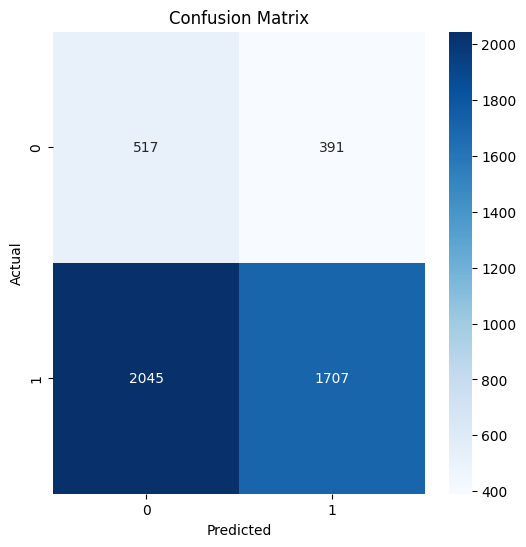

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_val, (y_val_pred_prob > 0.5).astype(int))  # Use 0.5 threshold

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model creation function
def create_model(learning_rate=0.001, dropout_rate=0.5, num_neurons=128):
    input_layer = Input(shape=(X_train.shape[1],))
    x = Dense(num_neurons)(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64)(x)
    x = LeakyReLU()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(32)(x)
    x = LeakyReLU()(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define the parameter grid
param_dist = {
    'learning_rate': [0.001, 0.01, 0.0001],
    'dropout_rate': [0.3, 0.5, 0.7],
    'num_neurons': [64, 128, 256],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
}

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train_binary, class_weight={0: 10.0, 1: 1.0})

# Print the best parameters and best score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Evaluate the best model on validation data
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val).round()  # Binary output (0 or 1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


ValueError: Found input variables with inconsistent numbers of samples: [18640, 23300]

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim):
    return Embedding(input_dim=input_dim, output_dim=output_dim)

# Function to dynamically test different embedding dimensions
def dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns):
    # Initialize a dictionary to store LabelEncoders for each column
    label_encoders = {}
    
    # Encode multilabel columns (i.e., columns containing semicolons) using LabelEncoder
    for col in multilabel_columns:
        le = LabelEncoder()
        
        # Combine the train and test data to fit the encoder on both datasets
        all_data = pd.concat([train_data[col], test_data[col]], axis=0)
        le.fit(all_data)  # Fit on the combined data
        
        # Apply the encoder to both train and test data
        train_data[col] = le.transform(train_data[col])
        test_data[col] = le.transform(test_data[col])
        
        label_encoders[col] = le  # Store the encoder for potential inverse transformation

    # Define maximum number of categories for each multilabel column
    max_categories = {col: len(label_encoders[col].classes_) for col in multilabel_columns}
    best_embedding_dim = 5  # Default embedding dimension

    best_accuracy = 0
    embedding_dim_range = [4, 8, 16, 32, 64]  # Example values for embedding dimensions to search

    for embedding_dim in embedding_dim_range:
        print(f"Testing embedding dimension: {embedding_dim}")

        # Define the input for multilabel columns
        multilabel_inputs = []
        embedding_layers = []

        for col in multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            embedding_layer = create_embedding_layer(input_dim=max_categories[col], output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            multilabel_inputs.append(input_layer)
            embedding_layers.append(flattened_embedding)

        # Define the input for non-multilabel columns
        non_multilabel_inputs = []
        for col in non_multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            non_multilabel_inputs.append(input_layer)

        # Concatenate multilabel embeddings with non-multilabel features
        combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

        # Define the rest of the model
        x = Dense(128, activation='relu')(combined_features)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)

        # Build and compile the model
        model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Prepare data for training
        X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
        X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

        y_train = train_data['JobSat_Class']
        y_test = test_data['JobSat_Class']

        # Train the model
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_test, y_test),
            epochs=10,
            batch_size=32,
            verbose=0  # Set verbose to 0 for better performance during testing
        )

        # Evaluate the model and update best accuracy if needed
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy for embedding dimension {embedding_dim}: {val_accuracy:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_embedding_dim = embedding_dim
            print(f"New best embedding dimension: {best_embedding_dim} with accuracy {best_accuracy:.4f}")
    
    return best_embedding_dim

# Apply dynamic embedding search to find the best embedding dimension
best_embedding_dim = dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns)
print(f"The best embedding dimension is: {best_embedding_dim}")


Testing embedding dimension: 4


KeyError: 'JobSat_Class'

In your project for predicting job satisfaction using a deep learning approach with embeddings, several important aspects might need further attention to enhance the model's performance and overall effectiveness. Here are some key areas to consider:

1. **Data Quality and Cleaning**:
   - **Handling Missing Values**: Ensure that any missing values in the dataset are appropriately handled before training the model. You can consider imputation strategies, removing rows, or filling with default values based on domain knowledge.
   - **Outlier Detection**: Identify and handle outliers in the dataset that could adversely affect model training and predictions.

2. **Feature Engineering**:
   - **Feature Selection**: Conduct exploratory data analysis (EDA) to identify which features are most correlated with job satisfaction. You may want to explore advanced feature selection techniques beyond simple correlation, such as Recursive Feature Elimination (RFE) or LASSO regression.
   - **Creation of New Features**: Consider creating additional features that could provide more context or insights, such as interaction terms between different features.

3. **Embeddings Optimization**:
   - **Tuning Embedding Dimensions**: The choice of embedding dimensions (e.g., 16 in your case) may require optimization. Experimenting with different sizes might yield better performance.
   - **Pre-trained Embeddings**: If applicable, consider using pre-trained embeddings (e.g., GloVe, Word2Vec) for text data, which might provide richer representations than learning from scratch.

4. **Model Architecture**:
   - **Hyperparameter Tuning**: The current hyperparameter tuning is a good start, but consider expanding the search space (e.g., different architectures, activation functions, dropout rates) to find the optimal configuration.
   - **Regularization**: Incorporate techniques such as dropout or L2 regularization to prevent overfitting, especially if the model is complex or if you have limited data.
   - **Early Stopping**: Implement early stopping based on validation metrics to avoid overfitting and save training time.

5. **Evaluation Metrics**:
   - **Comprehensive Evaluation**: Use a variety of metrics beyond accuracy, especially if your classes are imbalanced (e.g., precision, recall, F1-score, ROC-AUC) to get a clearer picture of model performance.
   - **Cross-Validation**: Implement k-fold cross-validation to ensure that the model's performance is robust and not reliant on a particular train/test split.

6. **Interpretability**:
   - **Feature Importance Analysis**: Utilize techniques such as SHAP or LIME to interpret the model’s predictions and understand which features have the most significant impact on job satisfaction.
   - **Visualizations**: Create visualizations to understand data distributions, correlations, and model predictions to make informed decisions based on the results.

7. **Scalability and Deployment**:
   - **Model Deployment**: Consider how the model will be deployed in a production environment. You may need to develop a web application or API to serve predictions.
   - **Performance Monitoring**: Once deployed, set up monitoring to track model performance over time and identify potential drifts in data distribution.

By addressing these aspects, you can enhance the robustness and performance of your project, leading to more reliable predictions of job satisfaction. If you have specific areas where you would like more detailed suggestions, feel free to ask!